In [2]:
!pip install apyori
!pip install mlxtend

In [6]:
import pandas as pd
from apyori import apriori
data = pd.read_csv('store_data.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
basket = []
for i in range(0, data.shape[0]):
    transaction = [
        str(data.values[i, j]) 
        for j in range(data.shape[1]) 
        if str(data.values[i, j]) != 'nan'
    ]
    basket.append(transaction)

In [20]:
# 2-itemset association rules
rules_2 = apriori(basket, min_support=0.0025, min_confidence=0.2, min_lift=3, max_length=2)

# first 10 rules for 2 itemsets
res_2 = list(rules_2)
print("\n2-itemset association rules:")
for r in res_2[:10]:
    print(f"Rule: {r.items}, Support: {r.support}, Confidence: {r.ordered_statistics[0].confidence}, Lift: {r.ordered_statistics[0].lift}")


2-itemset association rules:
Rule: frozenset({'turkey', 'barbecue sauce'}), Support: 0.0025329956005865884, Confidence: 0.2345679012345679, Lift: 3.751585985416831
Rule: frozenset({'extra dark chocolate', 'chicken'}), Support: 0.0027996267164378083, Confidence: 0.23333333333333334, Lift: 3.8894074074074076
Rule: frozenset({'light cream', 'chicken'}), Support: 0.004532728969470737, Confidence: 0.29059829059829057, Lift: 4.84395061728395
Rule: frozenset({'mushroom cream sauce', 'escalope'}), Support: 0.005732568990801226, Confidence: 0.3006993006993007, Lift: 3.790832696715049
Rule: frozenset({'pasta', 'escalope'}), Support: 0.005865884548726837, Confidence: 0.3728813559322034, Lift: 4.700811850163794
Rule: frozenset({'extra dark chocolate', 'olive oil'}), Support: 0.0026663111585121984, Confidence: 0.22222222222222224, Lift: 3.3742690058479536
Rule: frozenset({'fromage blanc', 'honey'}), Support: 0.003332888948140248, Confidence: 0.2450980392156863, Lift: 5.164270764485569
Rule: frozen

In [22]:
rules_3_zero = apriori(basket, min_support=0.5, min_confidence=0.8, min_lift=4, max_length=3)
results_3_zero = list(rules_3_zero)
print(f"\nNo. of 3-itemset rules found (expecting 0): {len(results_3_zero)}")


No. of 3-itemset rules found (expecting 0): 0


In [24]:
#  around 10 rules for 3 or more itemsets
rules_3_ten = apriori(basket, min_support=0.002, min_confidence=0.2, min_lift=3, max_length=3)
results_3_ten = list(rules_3_ten)
print("\n3-itemset association rules (around 10 rules):")
for rule in results_3_ten[:10]:
    print(f"Rule: {rule.items}, Support: {rule.support}, Confidence: {rule.ordered_statistics[0].confidence}, Lift: {rule.ordered_statistics[0].lift}")


3-itemset association rules (around 10 rules):
Rule: frozenset({'turkey', 'barbecue sauce'}), Support: 0.0025329956005865884, Confidence: 0.2345679012345679, Lift: 3.751585985416831
Rule: frozenset({'extra dark chocolate', 'chicken'}), Support: 0.0027996267164378083, Confidence: 0.23333333333333334, Lift: 3.8894074074074076
Rule: frozenset({'light cream', 'chicken'}), Support: 0.004532728969470737, Confidence: 0.29059829059829057, Lift: 4.84395061728395
Rule: frozenset({'mushroom cream sauce', 'escalope'}), Support: 0.005732568990801226, Confidence: 0.3006993006993007, Lift: 3.790832696715049
Rule: frozenset({'pasta', 'escalope'}), Support: 0.005865884548726837, Confidence: 0.3728813559322034, Lift: 4.700811850163794
Rule: frozenset({'extra dark chocolate', 'olive oil'}), Support: 0.0026663111585121984, Confidence: 0.22222222222222224, Lift: 3.3742690058479536
Rule: frozenset({'fromage blanc', 'honey'}), Support: 0.003332888948140248, Confidence: 0.2450980392156863, Lift: 5.1642707644

In [26]:
#  around 30 rules for 3 or more itemsets
rules_3_thirty = apriori(basket, min_support=0.0063, min_confidence=0.38, min_lift=2, max_length=4)
results_3_thirty = list(rules_3_thirty)
print(f"\nNumber of 3-itemset rules found (expecting around 30): {len(results_3_thirty)}")


Number of 3-itemset rules found (expecting around 30): 29


In [28]:
#  around 100 rules for 3 or more itemsets
rules_3_hundred = apriori(basket, min_support=0.005, min_confidence=0.21, min_lift=2, max_length=4)
results_3_hundred = list(rules_3_hundred)
print(f"\nNumber of 3-itemset rules found (expecting around 100): {len(results_3_hundred)}")


Number of 3-itemset rules found (expecting around 100): 114


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import time

In [34]:
data = pd.read_csv('store_data.csv', header=None)
data.head()
basket = []
for i in range(0, data.shape[0]):
    transaction = [
        str(data.values[i, j]) 
        for j in range(data.shape[1]) 
        if str(data.values[i, j]) != 'nan'
    ]
    basket.append(transaction)

In [38]:
te = TransactionEncoder()
te_data = te.fit(basket).transform(basket)
df = pd.DataFrame(te_data, columns=te.columns_)

In [40]:
# Defining the hyperparameters to test the comparison
min_supports = [0.01, 0.03, 0.05]
min_confidences = [0.5, 0.6]
min_lifts = [1, 2, 3]
max_lengths = [2, 3]

In [42]:
results = {
    'Algorithm': [],
    'Min Support': [],
    'Min Confidence': [],
    'Min Lift': [],
    'Max Length': [],
    'Execution Time': [],
    'Num Rules': []
}

In [44]:
for min_support in min_supports:
    for min_confidence in min_confidences:
        for min_lift in min_lifts:
            for max_length in max_lengths:
                
                # Apriori
                start_time_apriori = time.time()
                frequent_itemsets_apriori = apriori(df, min_support=min_support, use_colnames=True)
                rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=min_lift)
                end_time_apriori = time.time()

                # Results of Apriori
                results['Algorithm'].append('Apriori')
                results['Min Support'].append(min_support)
                results['Min Confidence'].append(min_confidence)
                results['Min Lift'].append(min_lift)
                results['Max Length'].append(max_length)
                results['Execution Time'].append(end_time_apriori - start_time_apriori)
                results['Num Rules'].append(len(rules_apriori))

                # FP-Growth
                start_time_fpgrowth = time.time()
                frequent_itemsets_fpgrowth = fpgrowth(df, min_support=min_support, use_colnames=True)
                rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=min_lift)
                end_time_fpgrowth = time.time()

                # Results of FP-Growth
                results['Algorithm'].append('FP-Growth')
                results['Min Support'].append(min_support)
                results['Min Confidence'].append(min_confidence)
                results['Min Lift'].append(min_lift)
                results['Max Length'].append(max_length)
                results['Execution Time'].append(end_time_fpgrowth - start_time_fpgrowth)
                results['Num Rules'].append(len(rules_fpgrowth))


results_df = pd.DataFrame(results)

In [46]:
def plot_bar_results(x, y, y_label, title):
    plt.figure(figsize=(10, 6))
    

    for algorithm in results_df['Algorithm'].unique():
        subset = results_df[results_df['Algorithm'] == algorithm]
        plt.bar(subset[x].astype(str) + ' (' + algorithm + ')', subset[y], label=algorithm)

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

C:\Users\yoges\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\yoges\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\yoges\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


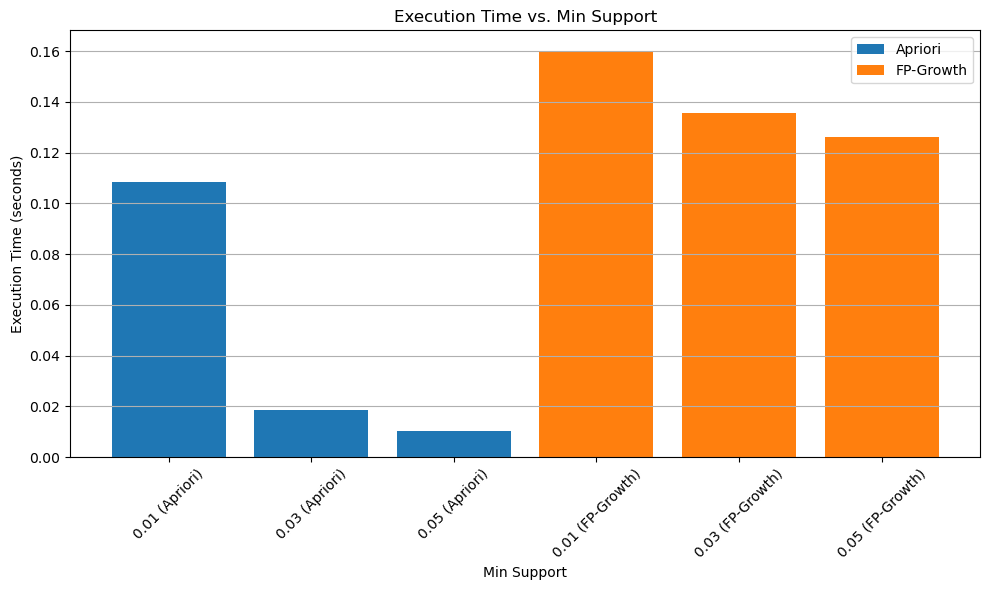

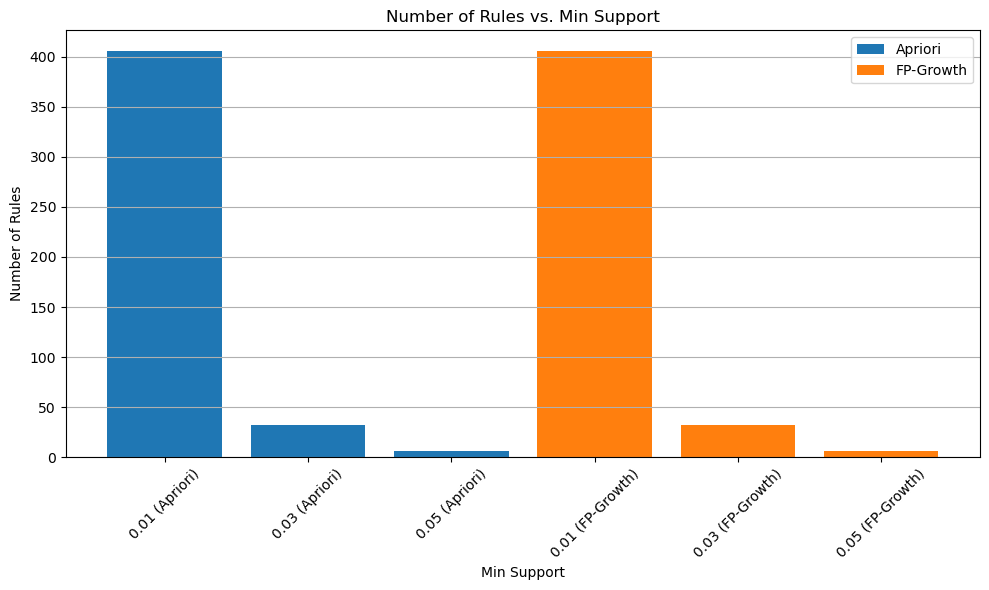

In [48]:
# Bar plot for Min Support
plot_bar_results('Min Support', 'Execution Time', 'Execution Time (seconds)', 'Execution Time vs. Min Support')
plot_bar_results('Min Support', 'Num Rules', 'Number of Rules', 'Number of Rules vs. Min Support')

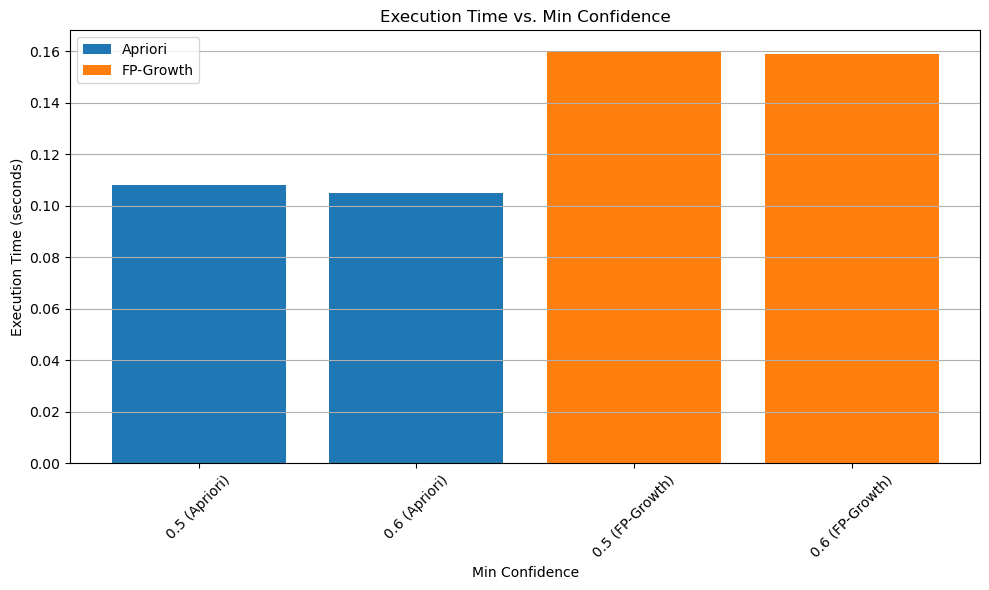

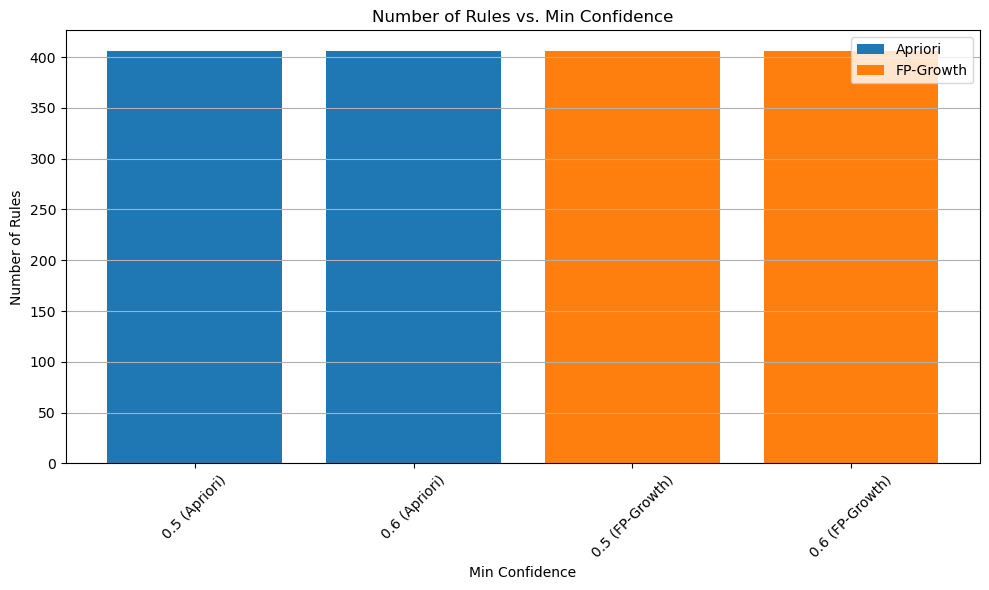

In [50]:
# Bar plot for Min Confidence
plot_bar_results('Min Confidence', 'Execution Time', 'Execution Time (seconds)', 'Execution Time vs. Min Confidence')
plot_bar_results('Min Confidence', 'Num Rules', 'Number of Rules', 'Number of Rules vs. Min Confidence')

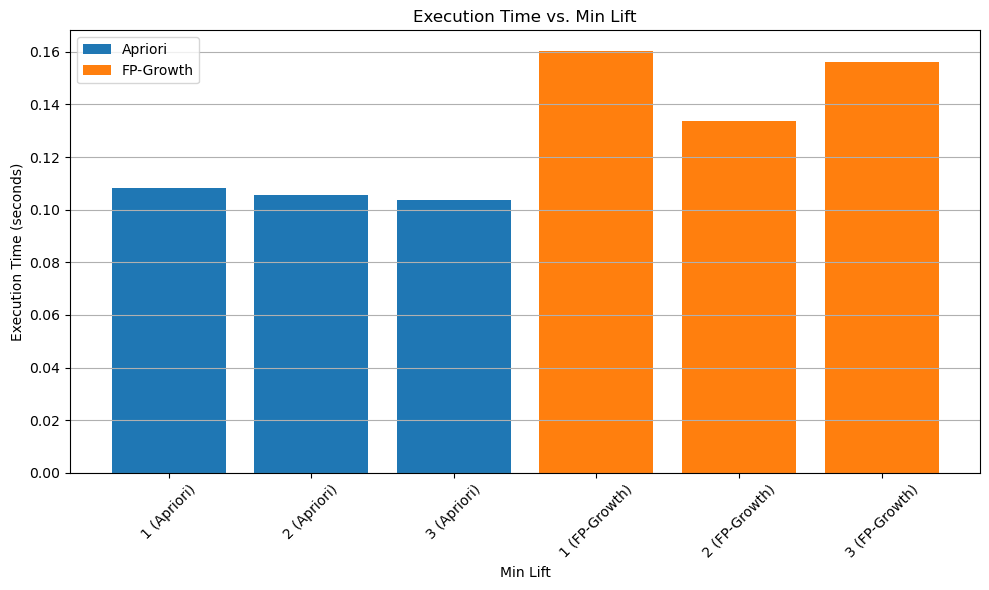

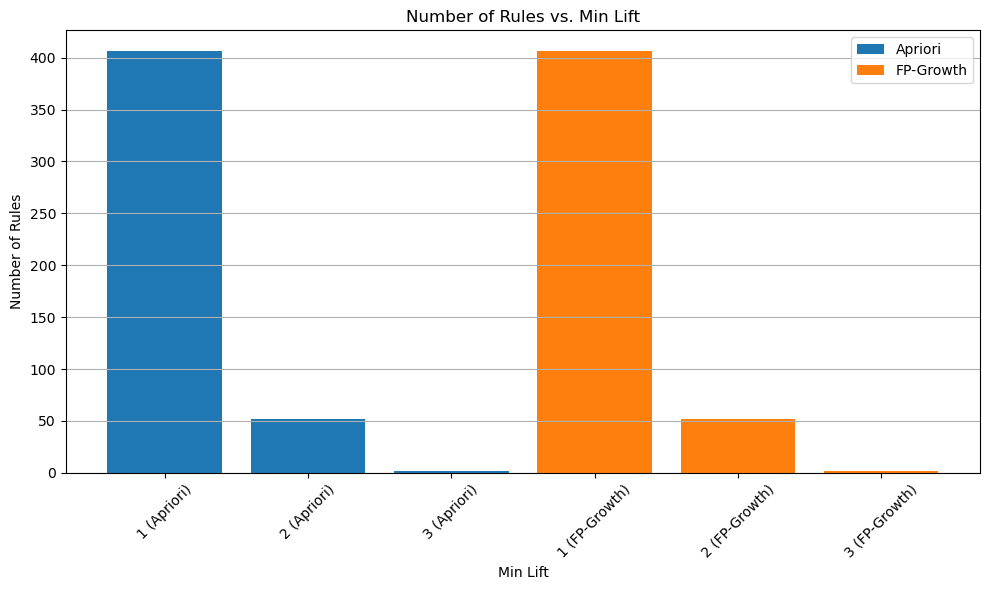

In [52]:
# Bar plot for Min Lift
plot_bar_results('Min Lift', 'Execution Time', 'Execution Time (seconds)', 'Execution Time vs. Min Lift')
plot_bar_results('Min Lift', 'Num Rules', 'Number of Rules', 'Number of Rules vs. Min Lift')


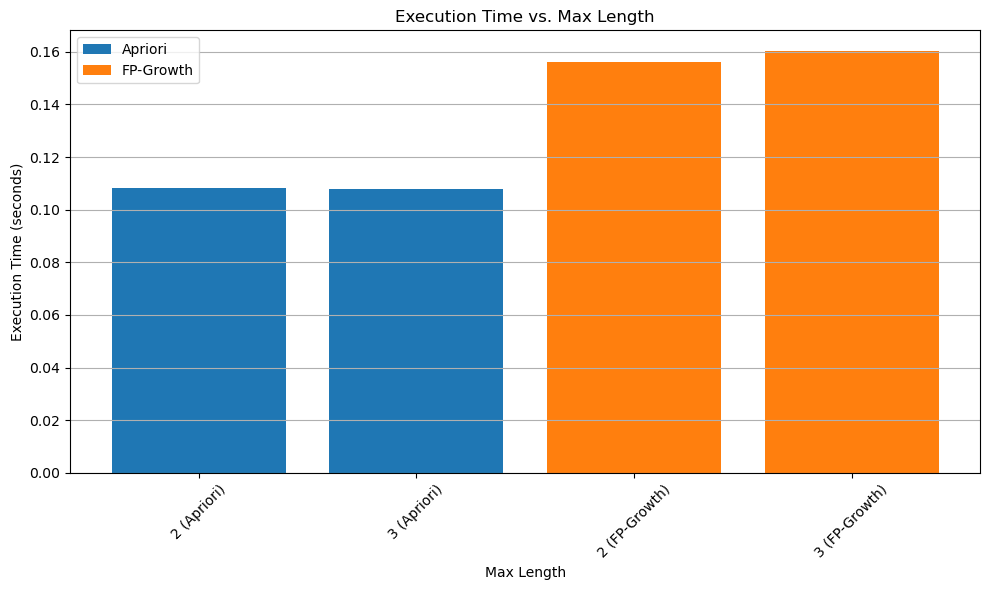

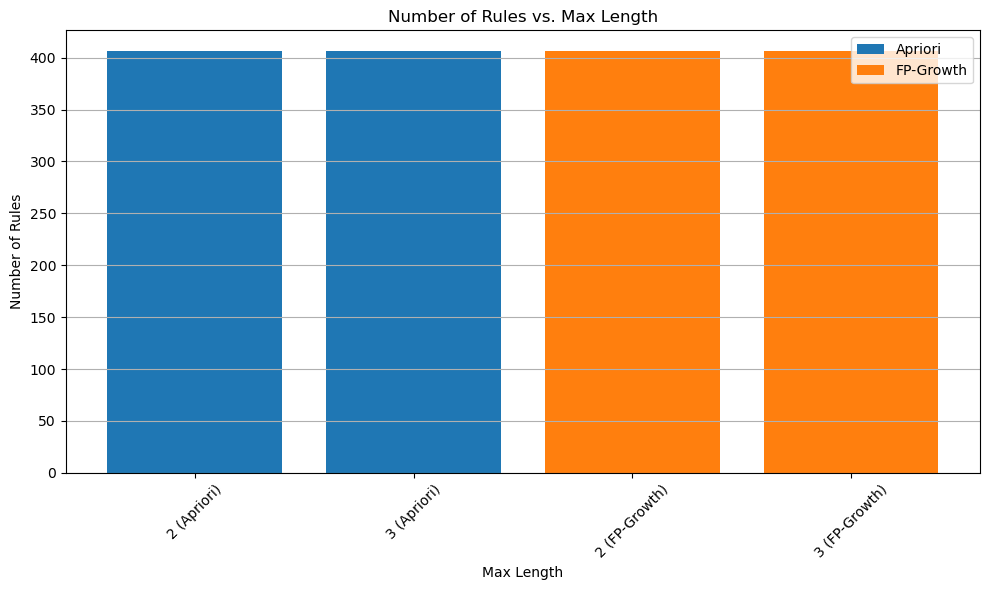

In [54]:
# Bar plot for Max Length
plot_bar_results('Max Length', 'Execution Time', 'Execution Time (seconds)', 'Execution Time vs. Max Length')
plot_bar_results('Max Length', 'Num Rules', 'Number of Rules', 'Number of Rules vs. Max Length')

Only the time taken for performing (Execution Time) Apriori and FP Growth changes, the number of Rules generated won't change and it remains the same for both the Apriori and FP Growth.